In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iris_data = sns.load_dataset('iris')

#### Checking for missing data

In [3]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [4]:
iris_data.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [5]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


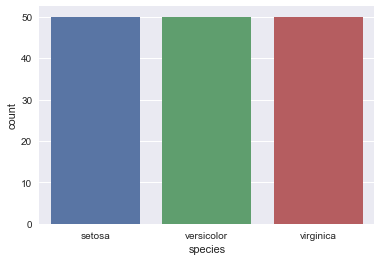

In [6]:
sns.countplot(x='species',data=iris_data)

### Which classification method works well?

# K - Nearest Neighbor (KNN)
K Nearest Neighbor is a classification method. However, it is very sensitive to outliers, which affects the accuracy of the KNN classifier since it's based on calcualting the distance between observations (or data points). Therefore, not scaling large numbers leads to misinterpretation of the data due to large effects.

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(iris_data.drop('species',axis=1))
scaledData = scaler.transform(iris_data.drop('species',axis=1))
scaledDF = pd.DataFrame(scaledData, columns=iris_data.columns[:-1])
scaledDF

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
5,-0.537178,1.939791,-1.169714,-1.052180
6,-1.506521,0.788808,-1.340227,-1.183812
7,-1.021849,0.788808,-1.283389,-1.315444
8,-1.748856,-0.362176,-1.340227,-1.315444
9,-1.143017,0.098217,-1.283389,-1.447076


In [8]:
from sklearn.model_selection import train_test_split
X = scaledDF
Y = iris_data['species']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3, random_state=101)

print ("Training sample: ",X_train.shape[0])
print ("Testing Sample: ",X_test.shape[0])

Training sample:  105
Testing Sample:  45


#### Choosing the best K neighbor(s)

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
knnError = []
for N_neighbor in range(1,50):
    knnModel = KNeighborsClassifier(n_neighbors=N_neighbor)
    knnModel.fit(X_train,Y_train)
    predictions = knnModel.predict(X_test)
    knnError.append(np.mean(predictions != Y_test))

#### visualizing error

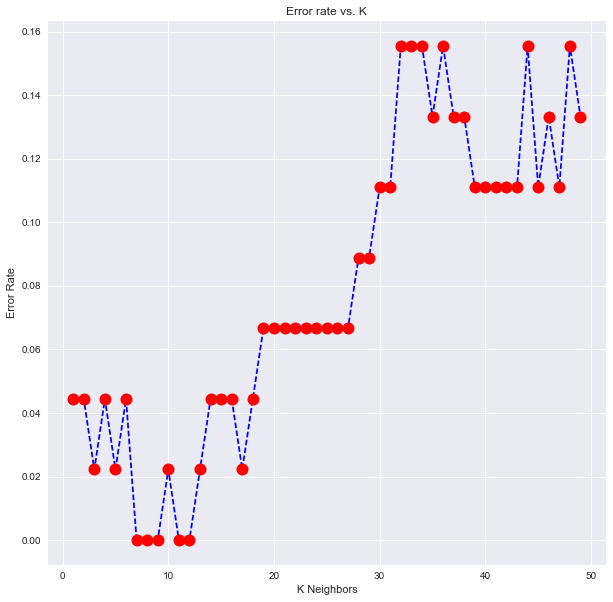

In [11]:
plt.figure(figsize=(10,10))
plt.plot(range(1,50), knnError, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=12)
plt.title('Error rate vs. K')
plt.xlabel('K Neighbors')
plt.ylabel('Error Rate')

This shows that our classifier tend to perform extremely well when the number of neighbors is equals to 3 with an error rate around 2%.

In [12]:
from sklearn.metrics import confusion_matrix,classification_report

knnModel = KNeighborsClassifier(n_neighbors=3)
knnModel.fit(X_train,Y_train)
prediction = knnModel.predict(X_test)

print (confusion_matrix(Y_test,prediction))
print (classification_report(Y_test,prediction))

[[13  0  0]
 [ 0 20  0]
 [ 0  1 11]]
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        13
 versicolor       0.95      1.00      0.98        20
  virginica       1.00      0.92      0.96        12

avg / total       0.98      0.98      0.98        45



The model has a very high percision and recall rates for each type of species.

# Random Forests

Since decision trees are well known to overfit the data, Random Forests is another classification method that aims to lower the fitting bias. Random Forests are based on bootstrap aggregation. Thus, a'Tree bag', refers to the idea of choosing several random samples with replacement from the training set and try to fit trees to these samples.

In [13]:
X = iris_data.drop('species',axis=1)
Y = iris_data['species']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3, random_state=101)

print ("Training sample: ",X_train.shape[0])
print ("Testing Sample: ",X_test.shape[0])

Training sample:  105
Testing Sample:  45


In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_train,Y_train)
predictions = rf.predict(X_test)

In [16]:
print (classification_report(Y_test,predictions))
print (confusion_matrix(Y_test,predictions))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        13
 versicolor       0.95      0.95      0.95        20
  virginica       0.92      0.92      0.92        12

avg / total       0.96      0.96      0.96        45

[[13  0  0]
 [ 0 19  1]
 [ 0  1 11]]


The model has a high recall and precision rates for setosa (100%),but slightly lower accuracy metrics for versicolor and virginica. However, compairng the avrg precision and recall rates of KNN to Random Forests, KNN tend to perform better by 2% (which is not a lot, but it's still something).

# Support Vector Machine (SVM)

is a non-probabilistic binary linear classifier that classify data into *N* separate categories in space. SVM tries to create clear, as well as wide, boundaries between these categories in order to better predict, and improve, the accuracy of the classifier when encountring a new data point(s).

In [17]:
from sklearn.svm import SVC

In [18]:
svm = SVC()

In [19]:
svm.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Grid Search 

Grid search is a technique used to enhance and choose the best fit model from a set of SVM models by trying the different combinations of a set of parameters. You can think of the parameters being used in the grid search process to be represented in a matrix such that each cell is a combination of two paratmers. Each cell is then filled out with a score indicating the fit of the model at those specific parameters. Afterwards, 'refit==True' returns the best fit of all models.

In [22]:
from sklearn.grid_search import GridSearchCV

/Users/Mowafak/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/Mowafak/anaconda/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [23]:
param_grid = {'C':[0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]}

In [24]:
gridSearch = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [25]:
gridSearch.fit(X_train,Y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] gamma=1, C=0.1 ..................................................
[CV] ......................... gamma=1, C=0.1, score=0.916667 -   0.0s
[CV] gamma=1, C=0.1 ..................................................
[CV] ......................... gamma=1, C=0.1, score=0.914286 -   0.0s
[CV] gamma=1, C=0.1 ..................................................
[CV] ......................... gamma=1, C=0.1, score=0.882353 -   0.0s
[CV] gamma=0.1, C=0.1 ................................................
[CV] ....................... gamma=0.1, C=0.1, score=0.750000 -   0.0s
[CV] gamma=0.1, C=0.1 ................................................
[CV] ....................... gamma=0.1, C=0.1, score=0.771429 -   0.0s
[CV] gamma=0.1, C=0.1 ................................................
[CV] ....................... gamma=0.1, C=0.1, score=0.764706 -   0.0s
[CV] gamma=0.01, C=0.1 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ..................... gamma=0.001, C=0.1, score=0.714286 -   0.0s
[CV] gamma=0.001, C=0.1 ..............................................
[CV] ..................... gamma=0.001, C=0.1, score=0.352941 -   0.0s
[CV] gamma=1, C=1 ....................................................
[CV] ........................... gamma=1, C=1, score=0.944444 -   0.0s
[CV] gamma=1, C=1 ....................................................
[CV] ........................... gamma=1, C=1, score=0.914286 -   0.0s
[CV] gamma=1, C=1 ....................................................
[CV] ........................... gamma=1, C=1, score=0.941176 -   0.0s
[CV] gamma=0.1, C=1 ..................................................
[CV] ......................... gamma=0.1, C=1, score=1.000000 -   0.0s
[CV] gamma=0.1, C=1 ..................................................
[CV] ......................... gamma=0.1, C=1, score=0.914286 -   0.0s
[CV] gamma=0.1, C=1 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.3s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'gamma': [1, 0.1, 0.01, 0.001], 'C': [0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=3)

#### Our best parameters are:

In [26]:
gridSearch.best_params_

{'C': 1, 'gamma': 0.1}

In [27]:
predictions = gridSearch.predict(X_test)

In [28]:
confusion_matrix(Y_test,predictions)

array([[13,  0,  0],
       [ 0, 19,  1],
       [ 0,  0, 12]])

In [29]:
print (classification_report(Y_test,predictions))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        13
 versicolor       1.00      0.95      0.97        20
  virginica       0.92      1.00      0.96        12

avg / total       0.98      0.98      0.98        45



This provides a survey of these three common classification approaches in machine learning. The percision and recall rates for this dataset are very high, however, it's not always the case for large datasets.